In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Read the CSV File
df = pd.read_csv('NYC_Jobs.csv')

In [3]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,577220,DEPT OF PARKS & RECREATION,External,10,Associate Park Service Worker,ASSOCIATE PARK SERVICE WORKER,Competitive-1,81106,00,Building Operations & Maintenance,...,Note: Salary will increase beginning of summer...,Parks Employees:\t 1) From a Parks computer: A...,NaN,Staten Island,NaN,"Residency in New York City, Nassau, Orange, Ro...",03/03/2023,NaN,03/15/2023,08/08/2023
1,571454,DEPT OF ENVIRONMENT PROTECTION,External,2,Instrumentation Specialist II - 2 positions,INSTRUMENTATION SPECIALIST,Competitive-1,91001,02,Building Operations & Maintenance,...,The City of New York is an inclusive equal opp...,Click the âApply Nowâ button,35 hours per week / May be required to work sh...,"10 Walker Road Valhalla, NY 10595",NaN,New York City residency is not required for th...,01/30/2023,NaN,04/17/2023,08/08/2023
2,588481,BRONX DISTRICT ATTORNEY,External,10,Trial Division- Major Case Assistant District ...,ASSISTANT DISTRICT ATTORNEY (S,Exempt-4,30114,00,"Legal Affairs Public Safety, Inspections, & En...",...,NaN,We appreciate your interest in a position with...,NaN,NaN,NaN,New York State Residency is REQUIRED on the fi...,05/25/2023,24-MAY-2024,05/25/2023,08/08/2023
3,591162,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,"Regional Nurse Supervisor - STI Unit, Bureau o...",ADMINISTRATIVE PUBLIC HEALTH N,Competitive-1,1003C,00,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,07/03/2023,31-OCT-2023,07/03/2023,08/08/2023
4,548281,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Associate Energy Project Manager - Expense,CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,"Engineering, Architecture, & Planning Technolo...",...,DEP is an equal opportunity employer with a st...,Click on âApply Nowâ and submit a resume a...,35 hours per week,"59-17 Junction Blvd, Corona NY",NaN,New York City residency is generally required ...,09/07/2022,NaN,09/13/2022,08/08/2023


In [4]:
# To get an idea about how many null values in each column & find meaningful columns for the insight

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         6548 non-null   int64  
 1   Agency                         6548 non-null   object 
 2   Posting Type                   6548 non-null   object 
 3   # Of Positions                 6548 non-null   int64  
 4   Business Title                 6548 non-null   object 
 5   Civil Service Title            6548 non-null   object 
 6   Title Classification           6548 non-null   object 
 7   Title Code No                  6548 non-null   object 
 8   Level                          6548 non-null   object 
 9   Job Category                   6548 non-null   object 
 10  Full-Time/Part-Time indicator  6303 non-null   object 
 11  Career Level                   6548 non-null   object 
 12  Salary Range From              6548 non-null   f

# Let's find how many jobs are open to the public(External Job Postings) and How many are internal

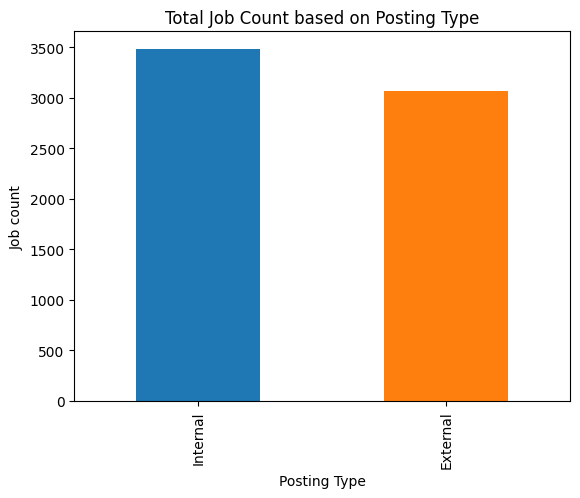

In [5]:
df['Posting Type'].value_counts().plot(kind='bar',color=sns.color_palette())
plt.title("Total Job Count based on Posting Type")
plt.ylabel('Job count')
plt.xlabel('Posting Type')
plt.show()

# We are interested to find out the top 7 Agencies that has the most job postings

In [6]:
agency = df['Agency'].value_counts()
print(agency)

DEPT OF HEALTH/MENTAL HYGIENE     966
DEPT OF ENVIRONMENT PROTECTION    864
HRA/DEPT OF SOCIAL SERVICES       690
DEPARTMENT OF TRANSPORTATION      491
NYC HOUSING AUTHORITY             344
DEPT OF DESIGN & CONSTRUCTION     312
DEPT OF PARKS & RECREATION        241
POLICE DEPARTMENT                 210
LAW DEPARTMENT                    189
DEPARTMENT OF CORRECTION          186
HOUSING PRESERVATION & DVLPMNT    180
OFFICE OF MANAGEMENT & BUDGET     149
DEPT OF YOUTH & COMM DEV SRVS     142
TAXI & LIMOUSINE COMMISSION       133
ADMIN FOR CHILDREN'S SVCS         129
FIRE DEPARTMENT                   127
OFFICE OF THE COMPTROLLER         117
FINANCIAL INFO SVCS AGENCY        115
DEPT. OF HOMELESS SERVICES         96
BRONX DISTRICT ATTORNEY            87
DEPT OF CITYWIDE ADMIN SVCS        81
ADMIN TRIALS AND HEARINGS          63
DEPARTMENT OF INVESTIGATION        56
DEPARTMENT OF CITY PLANNING        48
DEPARTMENT OF BUILDINGS            44
CONSUMER AND WORKER PROTECTION     42
OFFICE OF EM

In [7]:
external_counts = df[df['Posting Type'] == 'External']['Agency'].value_counts()

# Print the count of external postings for each agency
print(external_counts)

DEPT OF HEALTH/MENTAL HYGIENE     472
DEPT OF ENVIRONMENT PROTECTION    398
HRA/DEPT OF SOCIAL SERVICES       344
DEPARTMENT OF TRANSPORTATION      234
NYC HOUSING AUTHORITY             174
DEPT OF DESIGN & CONSTRUCTION     156
DEPARTMENT OF CORRECTION           89
HOUSING PRESERVATION & DVLPMNT     88
LAW DEPARTMENT                     82
DEPT OF PARKS & RECREATION         80
OFFICE OF MANAGEMENT & BUDGET      75
DEPT OF YOUTH & COMM DEV SRVS      72
TAXI & LIMOUSINE COMMISSION        66
ADMIN FOR CHILDREN'S SVCS          62
FIRE DEPARTMENT                    57
FINANCIAL INFO SVCS AGENCY         57
OFFICE OF THE COMPTROLLER          53
DEPT. OF HOMELESS SERVICES         48
BRONX DISTRICT ATTORNEY            43
DEPT OF CITYWIDE ADMIN SVCS        41
POLICE DEPARTMENT                  32
ADMIN TRIALS AND HEARINGS          31
DEPARTMENT OF INVESTIGATION        28
DEPARTMENT OF CITY PLANNING        23
DEPARTMENT OF BUILDINGS            22
CONSUMER AND WORKER PROTECTION     21
OFFICE OF EM

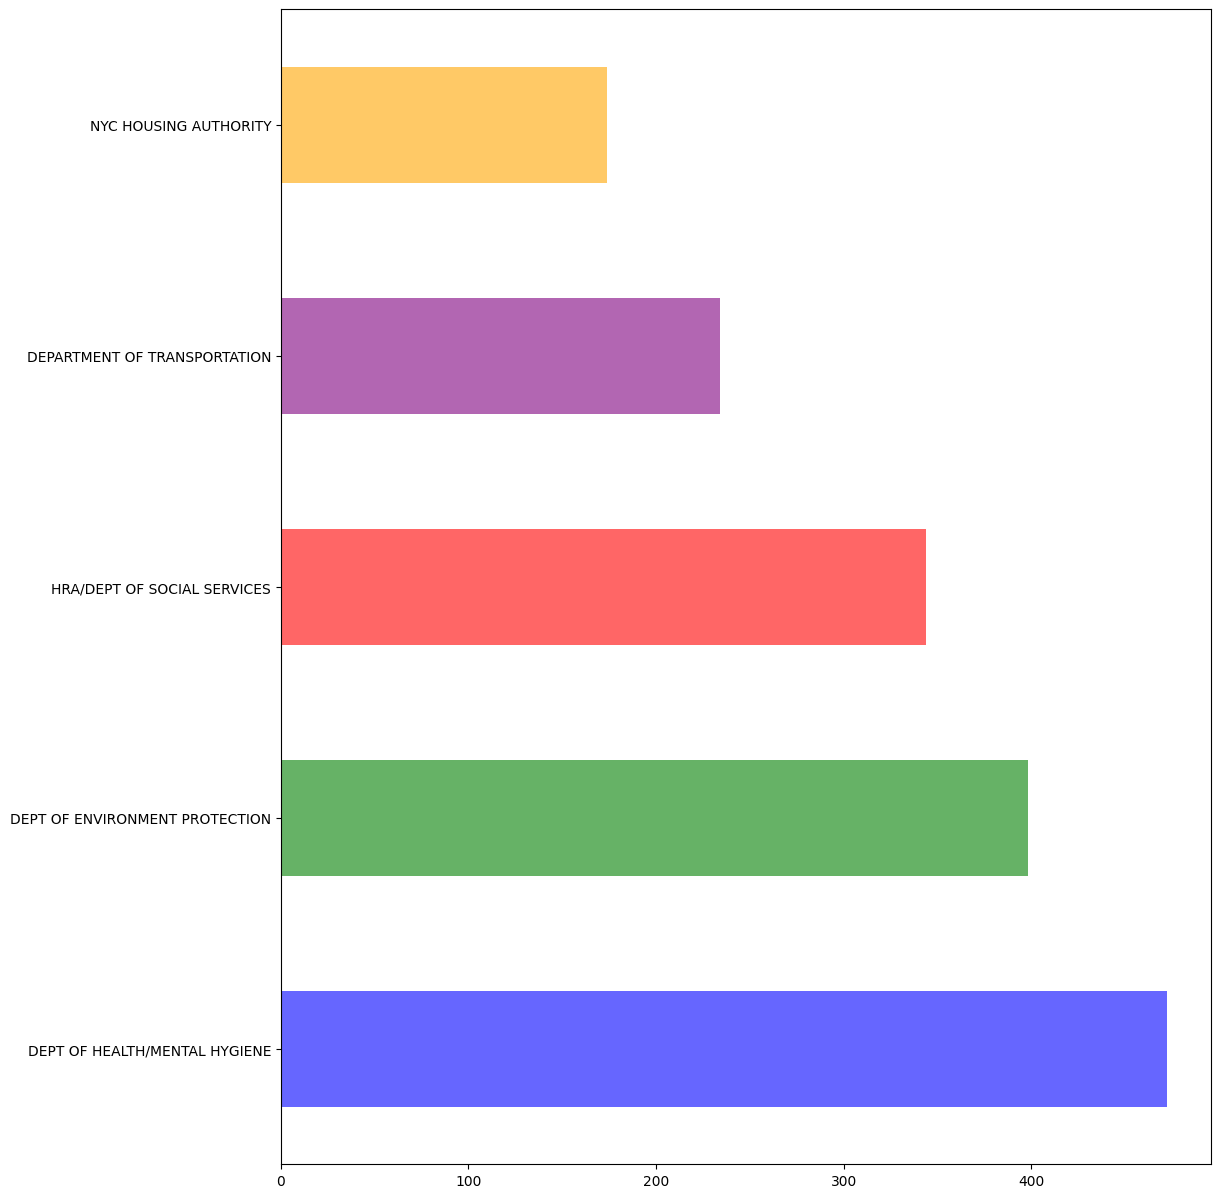

In [8]:
#top 5 agencies providing highest job vacancies open to general public
top_5_external_agencies = external_counts.head(5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
top_5_external_agencies.plot(kind='barh',alpha=0.6, figsize=(12,15), color=colors)
plt.show()

In [9]:
label=['min_salary','max_salary']
def salary_based_on_job_category(job,salary_freq):
     sal_freq_data=df[df['Salary Frequency']==salary_freq]
     job_cat_data=sal_freq_data[sal_freq_data['Job Category']==job]
     min_salary=job_cat_data['Salary Range From']
     max_salary=job_cat_data['Salary Range To']
     avg_max_salary=sum(max_salary)/len(max_salary)
     print("Count of "+salary_freq+" Job position in ("+job+") is :",len(max_salary))
     avg_min_salary=sum(min_salary)/len(min_salary)

         # Specify colors for the bars
     colors = ['blue', 'green']
     plt.bar(label,[avg_min_salary,avg_max_salary], color = colors)
     plt.title("Average Min Max "+salary_freq+" Salary for "+job)
     plt.show()
     print("Minimum Avg salary for the category:",avg_min_salary)
     print("Maximum Avg salary for the category:",avg_max_salary)

Count of Annual Job position in (Engineering, Architecture, & Planning) is : 693


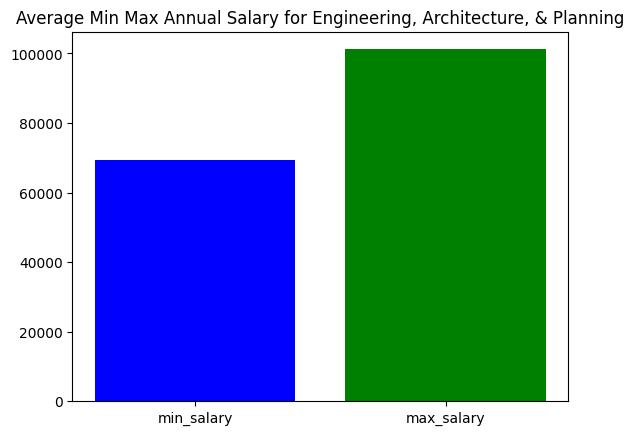

Minimum Avg salary for the category: 69360.82251082252
Maximum Avg salary for the category: 101240.24242424243


In [10]:
salary_based_on_job_category('Engineering, Architecture, & Planning','Annual')

Count of Hourly Job position in (Engineering, Architecture, & Planning) is : 28


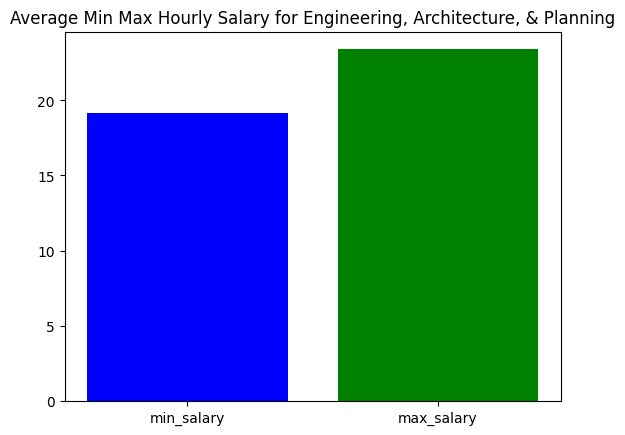

Minimum Avg salary for the category: 19.12885714285714
Maximum Avg salary for the category: 23.397835714285716


In [11]:
salary_based_on_job_category('Engineering, Architecture, & Planning','Hourly')

In [12]:
external_title_vacancy = df[df['Posting Type'] == 'External']['Civil Service Title'].value_counts()

# Print the count of external postings for each agency
print(external_title_vacancy)

COMMUNITY COORDINATOR             217
CITY RESEARCH SCIENTIST           174
CLERICAL ASSOCIATE                107
PRINCIPAL ADMINISTRATIVE ASSOC    106
AGENCY ATTORNEY                    96
                                 ... 
DECEDENT PROPERTY AGENT             1
AUTO BODY WORKER                    1
CITY VETERINARIAN (PART-TIME)       1
ASST COMMISSIONER FOR POLICY A      1
COMPUTER SPECIALIST (OPERATION      1
Name: Civil Service Title, Length: 427, dtype: int64


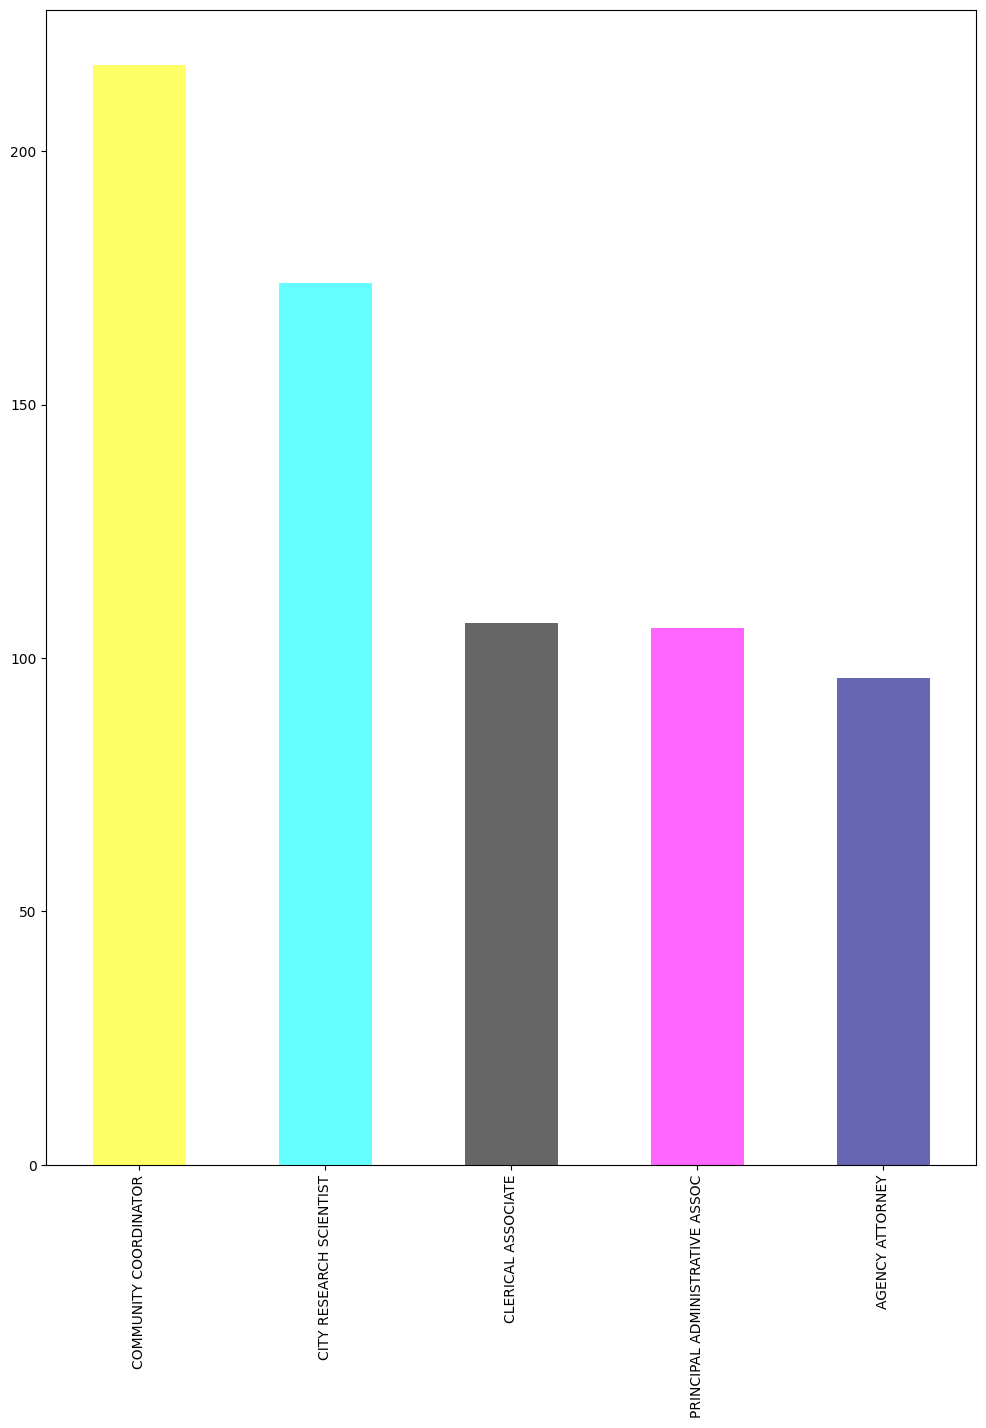

In [13]:
top_5_vacancy_titles = external_title_vacancy.head(5)
colors = ['yellow', 'cyan', 'black', 'magenta', 'navy']
top_5_vacancy_titles.plot(kind='bar',alpha=0.6, figsize=(12,15), color=colors)
plt.show()

# To get an instance of original dataframe df and divide the Job Postings as Internal & External

In [14]:
filtered_df = df[df['Posting Type'].isin(['Internal', 'External'])]

In [15]:
 grouped = filtered_df.groupby('Agency')['Posting Type'].value_counts().unstack()

# Another Syntax could be if using Original Dataframe instead of instance filtered_df
# grouped = df[df['Posting Type'].isin(['Internal', 'External'])].groupby('Agency')['Posting Type'].value_counts().unstack(fill_value=0)

print(grouped)

Posting Type                    External  Internal
Agency                                            
ADMIN FOR CHILDREN'S SVCS             62        67
ADMIN TRIALS AND HEARINGS             31        32
BOARD OF CORRECTION                    6         6
BOROUGH PRESIDENT-BRONX                5         5
BOROUGH PRESIDENT-QUEENS               1         1
BRONX COMMUNITY BOARD #7               1         1
BRONX DISTRICT ATTORNEY               43        44
BUSINESS INTEGRITY COMMISSION          7         7
CAMPAIGN FINANCE BOARD                 9         9
CIVIL SERVICE COMMISSION               1         1
CIVILIAN COMPLAINT REVIEW BD           4         6
CONSUMER AND WORKER PROTECTION        21        21
CULTURAL AFFAIRS                       2         2
DEPARTMENT FOR THE AGING              18        18
DEPARTMENT OF BUILDINGS               22        22
DEPARTMENT OF BUSINESS SERV.          11        11
DEPARTMENT OF CITY PLANNING           23        25
DEPARTMENT OF CORRECTION       

In [16]:
# Since the Values in the column 'Residency Requirement', has multiple statements to convey if NY state residency is required, not required, or needed after sometime, there are 95 different values
df['Residency Requirement'].nunique()

95

In [17]:
# To visualize the statements used to depict 3 conditions,NY state residency is required, not required, or needed after sometime, multiple statements need to be converted into just 3
df['Residency Requirement'].unique()

array(['Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service. New York City residency required within 90 days of hire for all other candidates.',
       'New York City residency is not required for this position.',
       'New York State Residency is REQUIRED on the first day of employment.',
       'New York City Residency is not required for this position',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.',
       'New York City Residency is not required for this position.',
       'NYCHA has no residency requirements.',
       'New

In [18]:
# Create a New DataFrame named data that holds all possible values of residency requirement

data = {'Residency Requirement': [
    'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service. New York City residency required within 90 days of hire for all other candidates.',
       'New York City residency is not required for this position.',
       'New York State Residency is REQUIRED on the first day of employment.',
       'New York City Residency is not required for this position',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.',
       'New York City Residency is not required for this position.',
       'NYCHA has no residency requirements.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.  See DCAS Directive No. 2020-2 (https://www1.nyc.gov/assets/dcas/downloads/pdf/agencies/directive_2020_2.pdf) regarding residency requirement during the COVID-19 emergency.',
       'This position is exempt from NYC residency requirements.',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam, or Westchester counties required for employees with over two years of city service.  New York City residency required within 90 days of hire for all other candidates.',
       'NYCHA has no Residency Requirements.',
       'New York City Residency Is Not Required For This Position.',
       'NYC Residency is not required for this position.',
       'City Residency is not required for this position.',
       'City Residency is not required for this position',
       '6/13New York City Residency is not required for this position.',
       'New York City residency is not required.',
       'NEW YORK CITY RESIDENCY IS NOT REQUIRED FOR THIS TITLE..',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service.  New York City residency required for all other candidates.',
       'New York City residency is not required',
       'Good Afternoon NYCHA has no residency requirements.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview',
       'There is no NYC Residency requirement for this position.',
       'New York City Residency is not required for this position; however, you must reside in New York State.',
       'There is no residency requirement for this position.',
       'This is a full time in-person position at OMBâ\x80\x99s offices at 255 Greenwich Street',
       'New York City Residency is required for this position.',
       "We appreciate your interest in a position with the Bronx District Attorney's Office. Click Apply for Job to apply.  **LOAN FORGIVENESS: The federal government provides student loan forgiveness through its Public Service Loan Forgiveness Program (PLF) to all qualifying public service employees. Working with DCWP qualifies you as a public service employee and you may be able to take advantage of this program while working full-time and meeting the program's other requirements. Please visit the Public Service Loan Forgiveness Program site to view the eligibility requirements: https://studentaid.gov/manage-loans/forgiveness-cancellation/public-service.",
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible  to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.',
       'NYC Residency is not required for this title.', 'TBD',
       'New York City residency is required within 90 days of appointment. However, City employees in certain titles who have worked for the City 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland or Orange County.',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam, or Westchester counties required for employees with over two years of city service. New York City residency is required within 90 days of hire for all other candidates.',
       'NYC residency is not required.',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam, or Westchester counties required for employees with over two years of city service. New York City residency required within 90 days of hire for all other candidates.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County.   Due to the current State of Emergency in the City of New York for the COVID-19 pandemic, the Laboratory Microbiologist and Associate Laboratory Microbiologist titles do not have a residency requirement. When the State of Emergency ends, candidates have 6 months to move to New York City to comply with the residency requirement. AMENDED **  To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.',
       'New York City residency is generally required within 90 days of appointment.  However, City employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County.  To determine if the residency requirement applies to you, please discuss with the agency representative at the time of the interview.',
       'NEW YORK CITY RESIDENCY IS NOT REQUIRED FOR THIS TITLE.',
       'NYC RESIDENCY IS NOT REQUIRED FOR THIS TITLE.',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service.  New York City residency required within 90 days of hire for all other candidates.',
       "The City of New York is an inclusive equal opportunity employer committed to recruiting and retaining a diverse workforce and providing a work environment that is free from discrimination and harassment based upon any legally protected status or protected characteristic, including but not limited to an individual's sex, race, color, ethnicity, national origin, age, religion, disability, sexual orientation, veteran status, gender identity, or pregnancy.",
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service. New York City residency required for all other candidates.',
       'New York City Residency is generally required within 90 days of appointment.  however, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County.  To determine if the residency requirements applies to you, please discuss with the agency representative at the time of the interview.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees  in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in  Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency  requirement applies to you, please discuss with the agency representative at the time of interview',
       'NYC residency is not required for this position.',
       'New York State residency is required for this position.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.   ADDITIONAL INFORMATION  Submission of an application package is not a guarantee that you will receive an interview.  Only those candidates under consideration will be contacted.  As a current or prospective employee of the City of New York, you may be eligible for federal loan forgiveness programs and state repayment assistance programs. Please review the notice to see if you may be eligible for programs and how to apply at nyc.gov/studentloans.',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service. New York City residency required for all other candidate within 90 days of hire.',
       'New York City residency is generally required for this position.',
       'There is no residency requirement for this title.',
       'New York State residency is required.',
       'New York City residency is required.',
       'City residency is not required for this position.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.  New York City Residency is not required for this position.',
       'New York City residency is not required for this title **',
       'A person serving in a mayoral agency in any of the following civil service titles shall be a resident of the city on the date that he or she assumes such title or shall establish City Residence within ninety days after such date and shall thereafter maintain City residency for as long as he or she serves in such title: agency heads,  including but not limited to Commissioner, First Deputy Commissioner, Executive Deputy Commissioner, Deputy Commissioner, General Counsel, Assistant Deputy Commissioner, Associate Commissioner, Assistant Commissioner.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.  All persons newly hired for employment by any City agency must provide proof of having received at least one dose of an approved COVID-19 vaccine prior to beginning their employment, except for those who obtain an exception due to medical or religious reasons through the reasonable accommodation process.',
       'New York City residency is not required for this position, However, you must reside in New York State.',
       'New York State Residency is REQUIRED on the first day of employment',
       'New York City Residency is not required for this title.',
       'NYC Residency is not currently required for this position',
       'New York Residency is not required for this title.',
       'New York City residency is not required for required for this position.',
       'New York City Residency is not required for this position  **Please review the qualifications for Level 1 only for this position**',
       'New York City Residency is not required for this position..',
       'NYC Residency is not required.',
       'The Trust has no residency requirements.',
       'New York City residency is currently not required.',
       'New York State Residency is REQUIRED on first day of employment.',
       'Residency is not a requirement for this position.',
       'New York City residency is  required within 90 days of appointment. However, city employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service. New York City residency required within 90 days for all other candidates.',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service.  New York City residency required for all other candidates within 90 days of hire.',
       'New York City residency is not required for this position. However, you must reside in New York State.',
       "New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview. There isn't a residency requirement for this position.",
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties require for employees with over two years of city service. New York City residency required within 90 days of hire for all other candidates.',
       'There is no residency requirements for this title.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.  ** THERE IS NO RESIDENCY REQUIREMENT FOR THIS POSITION**',
       'New York City residency is generally required within 90 days of appointment.  However, City Employees in certain titles who have worked for the city for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County.  To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.',
       'Except as otherwise provided herein, a person serving in a mayoral agency in any of the following civil service or office titles shall be a resident of the City on the date that he or she assumes such title or shall establish city residence within ninety days after such date and shall thereafter maintain city residency for as long as he or she serves in such title: agency heads, including but not limited to Commissioner, Director and Executive Director, First Deputy Commissioner, Executive Deputy Commissioner, Deputy Commissioner, General Counsel, Borough Commissioner, Assistant Deputy Commissioner, Associate Commissioner, Assistant Commissioner, and other senior level staff titles, identified on a list established pursuant to section 2(b) of this Order.',
       'NYC residency is required within 90 days of appointment.',
       'Residency in New York City, Nassau, Orange, Rockland, Suffolk, Putnam or Westchester counties required for employees with over two years of city service.  New York City residency required within 90 days of hiring for all other candidates.',
       'There is no residency requirement for',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of  interview.',
       'No Residency Requirement',
       'New York State Residency is required for this position.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss it with the agency representative at the time of the interview.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or  Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.',
       'New York City residency is generally required within 90 days of appointment.',
       'New York City residency is generally required within 90 days of appointment. City Employees in certain titles who have worked for 2 continuous years may also be able to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.',
       'New York City residency is not required for this position; however, you must reside in New York State.',
       'The is no residency requirement for this position.',
       "New York City Residency is not required for this position.  Minimum Qualification Requirements:  Must possess one of the following valid New York State licenses or certification: Registered Pharmacist Registered Professional Nurse Registered Physician's Assistant Certified Nurse Practitioner  **The licenses and/or certification listed above must be maintained for the duration of employment.",
       'New York City Residency is not required.',
       'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for two continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.'
]}

# Create DataFrame
df2 = pd.DataFrame(data)

# Create a function to simplify residency requirement values
def simplify_residency(value):
    value_lower = value.lower()  # Convert to lowercase for case-insensitive matching

    if re.search(r'new york city|new york state|nyc', value_lower):
        if re.search(r'not required|no residency', value_lower):
            return "NY Residency Not Required"
        elif re.search(r'required(?! within)', value_lower):
            return "New York Residency Required"
        elif re.search(r'required within', value_lower):
            return "NY Residency Required within Specific Timeframe"
    else:
        return "NY Residency Not Required"

# Apply the function to the 'Residency Requirement' column to create a new column
df['Simplified Residency'] = df['Residency Requirement'].apply(simplify_residency)

print(df[['Residency Requirement', 'Simplified Residency']])

                                  Residency Requirement  \
0     Residency in New York City, Nassau, Orange, Ro...   
1     New York City residency is not required for th...   
2     New York State Residency is REQUIRED on the fi...   
3     New York City Residency is not required for th...   
4     New York City residency is generally required ...   
...                                                 ...   
6543  New York City residency is generally required ...   
6544  New York City residency is generally required ...   
6545  New York City Residency is not required for th...   
6546  New York City Residency is not required for th...   
6547  New York City residency is generally required ...   

                                 Simplified Residency  
0                         New York Residency Required  
1                           NY Residency Not Required  
2                         New York Residency Required  
3                           NY Residency Not Required  
4     NY Re

In [19]:
df['Simplified Residency'].nunique() # Residency requirement now lowered to 3 unique values

3

In [20]:
df['Simplified Residency'].unique()

array(['New York Residency Required', 'NY Residency Not Required',
       'NY Residency Required within Specific Timeframe', None],
      dtype=object)

In [21]:
df5 = df[(df['Posting Type'] == 'External') & (df['Title Classification'] == 'Competitive-1')]
df5.count()

Job ID                           1803
Agency                           1803
Posting Type                     1803
# Of Positions                   1803
Business Title                   1803
Civil Service Title              1803
Title Classification             1803
Title Code No                    1803
Level                            1803
Job Category                     1803
Full-Time/Part-Time indicator    1727
Career Level                     1803
Salary Range From                1803
Salary Range To                  1803
Salary Frequency                 1803
Work Location                    1803
Division/Work Unit               1803
Job Description                  1803
Minimum Qual Requirements        1802
Preferred Skills                 1443
Additional Information           1472
To Apply                         1803
Hours/Shift                       802
Work Location 1                   844
Recruitment Contact                 0
Residency Requirement            1803
Posting Date

In [22]:
# Filtering & creating a new dataframe based on filtering column 'Simplified Residency'
filtered_df_residency = df[df['Simplified Residency'].isin(['New York Residency Required', 'NY Residency Not Required','NY Residency Required within Specific Timeframe'])]

In [23]:
print(filtered_df_residency)

      Job ID                          Agency Posting Type  # Of Positions  \
0     577220      DEPT OF PARKS & RECREATION     External              10   
1     571454  DEPT OF ENVIRONMENT PROTECTION     External               2   
2     588481         BRONX DISTRICT ATTORNEY     External              10   
3     591162   DEPT OF HEALTH/MENTAL HYGIENE     Internal               1   
4     548281  DEPT OF ENVIRONMENT PROTECTION     Internal               1   
...      ...                             ...          ...             ...   
6543  594217           DEPARTMENT OF FINANCE     External               1   
6544  591748   DEPT OF HEALTH/MENTAL HYGIENE     External               1   
6545  574567       ADMIN FOR CHILDREN'S SVCS     Internal               6   
6546  582618   DEPT OF DESIGN & CONSTRUCTION     External               1   
6547  593755   DEPT OF HEALTH/MENTAL HYGIENE     External               1   

                                         Business Title  \
0               

In [24]:
jobs_grouped_by_residency = filtered_df_residency.groupby(['Agency','Simplified Residency'])['# Of Positions'].sum()

print(jobs_grouped_by_residency)

Agency                       Simplified Residency                           
ADMIN FOR CHILDREN'S SVCS    NY Residency Not Required                          671
                             NY Residency Required within Specific Timeframe    231
ADMIN TRIALS AND HEARINGS    NY Residency Not Required                           50
                             NY Residency Required within Specific Timeframe    121
BOARD OF CORRECTION          NY Residency Required within Specific Timeframe     12
                                                                               ... 
TAXI & LIMOUSINE COMMISSION  NY Residency Not Required                           80
                             NY Residency Required within Specific Timeframe    129
TEACHERS RETIREMENT SYSTEM   NY Residency Required within Specific Timeframe     34
TECHNOLOGY & INNOVATION      NY Residency Not Required                            9
                             NY Residency Required within Specific Timeframe     12

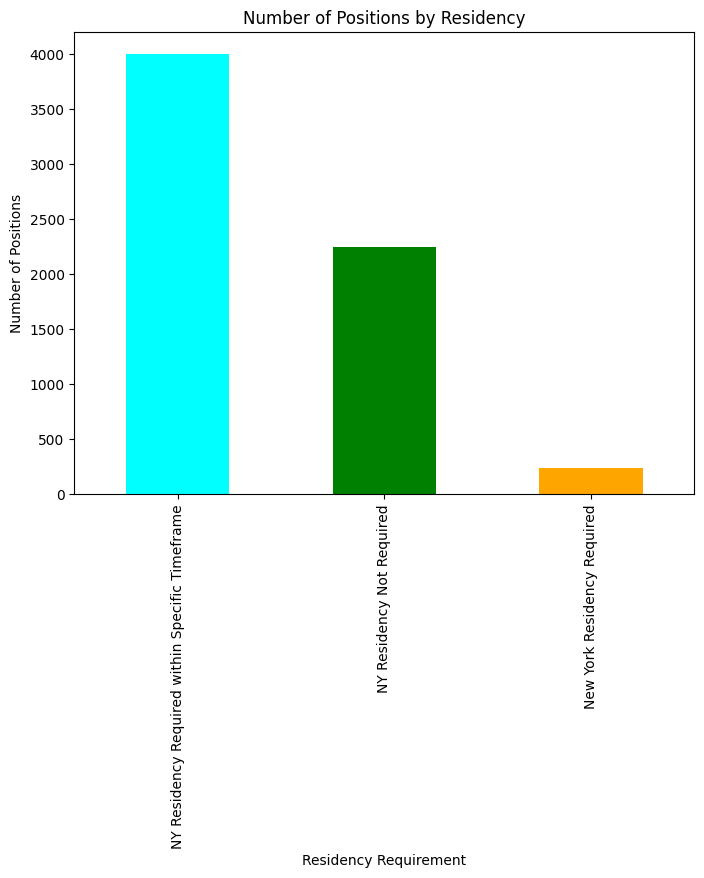

In [25]:
# Analyse How many positions need NY Residency and how many don't to see the competition.

residency_counts = df['Simplified Residency'].value_counts()
custom_colors = ['cyan', 'green', 'orange']
residency_counts.plot(kind='bar', figsize=(8, 6), color = custom_colors)

# Adding labels and title
plt.xlabel('Residency Requirement')
plt.ylabel('Number of Positions')
plt.title('Number of Positions by Residency')

# Display the plot
plt.show()

In [26]:
# To check how many unique Title Classifications are there to analyse whether competitive jobs or non-competitive jobs which ones are more available

df['Title Classification'].unique()

array(['Competitive-1', 'Exempt-4', 'Non-Competitive-5',
       'Pending Classification-2', 'Labor-3', 'Unclassified Service-6'],
      dtype=object)

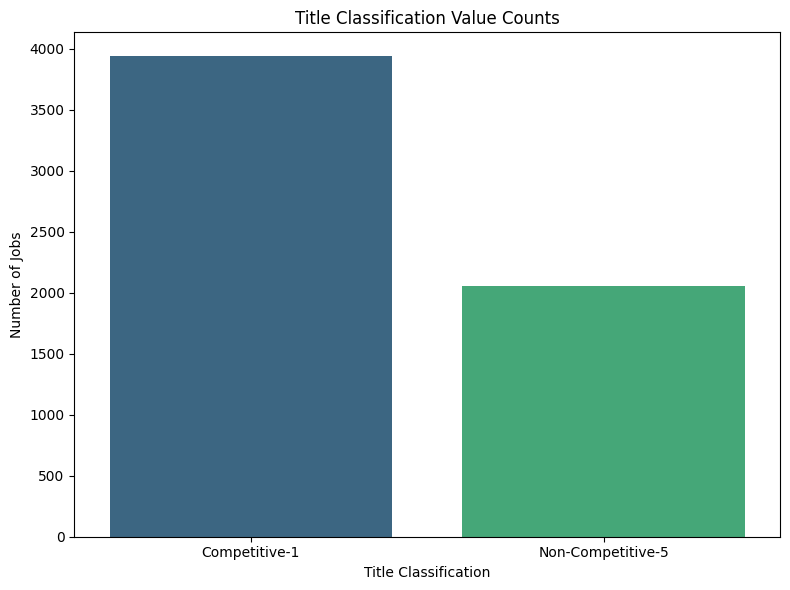

In [27]:
desired_values = ['Competitive-1', 'Non-Competitive-5']

# Filtering the DataFrame to include only desired values
filtered_df = filtered_df_residency[filtered_df_residency['Title Classification'].isin(desired_values)]

# Now computing value counts of each Title Classification
title_class_counts = filtered_df['Title Classification'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(x=title_class_counts.index, y=title_class_counts, palette='viridis')
plt.xlabel("Title Classification")
plt.ylabel("Number of Jobs")
plt.title("Title Classification Value Counts")
plt.tight_layout()
plt.show()